# keras-practice-01

## ダミーデータ

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 2.3606 - acc: 0.0930     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 2.3061 - acc: 0.1390     
Epoch 3/20
1000/1000 [==============================] - ETA: 0s - loss: 2.2957 - acc: 0.138 - 0s - loss: 2.2938 - acc: 0.1370     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 2.2673 - acc: 0.1500     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 2.2622 - acc: 0.1550     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 2.2405 - acc: 0.1720     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 2.1942 - acc: 0.1980     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 2.1695 - acc: 0.2190     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 2.1046 - acc: 0.2450     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 2.0468 - acc: 0.2720     
Epoch 11/20
1000/1000 [========

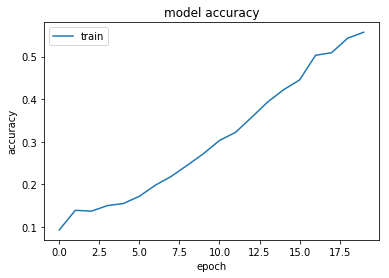

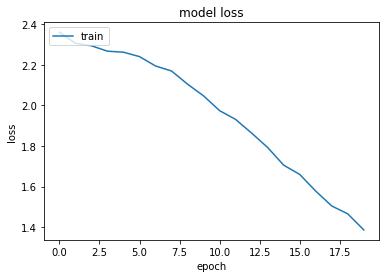

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# ダミーデータの作成
data = np.random.random((1000, 784))
labels = np.random.randint(10, size=(1000, 1))
labels = to_categorical(labels, 10) # ラベルの変換

# モデルの作成
model = Sequential()
model.add(Dense(64, input_dim=784))
model.add(Activation("relu"))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

# モデルのコンパイル
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 学習
history = model.fit(data, labels, epochs=20)


# 結果の表示
# 正答率
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## MNISTを利用した手書き数字の識別
### データの表示

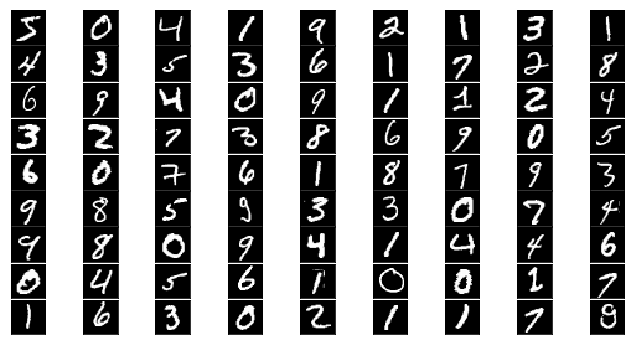

In [2]:
%matplotlib inline
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

#Kerasの関数でデータの読み込み。データをシャッフルして学習データと訓練データに分割してくれる
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

### 学習・テスト

60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.2459 - acc: 0.9247 - val_loss: 0.1148 - val_acc: 0.9633
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 0.1013 - acc: 0.9692 - val_loss: 0.0838 - val_acc: 0.9747
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 0.0737 - acc: 0.9777 - val_loss: 0.0744 - val_acc: 0.9775
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.0602 - acc: 0.9818 - val_loss: 0.0736 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.0496 - acc: 0.9851 - val_loss: 0.0746 - val_acc: 0.9799
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.0425 - acc: 0.9869 - val_loss: 0.0999 - val_acc: 0.9771
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 0.0379 - acc: 0.9880 - val_loss: 0.0733 - val_acc: 0.9818
Epoch 8/20
60000/60000

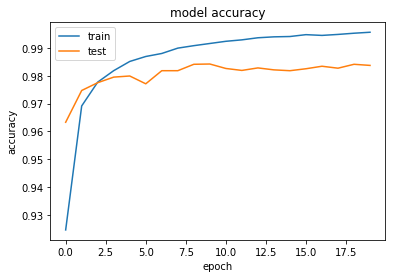

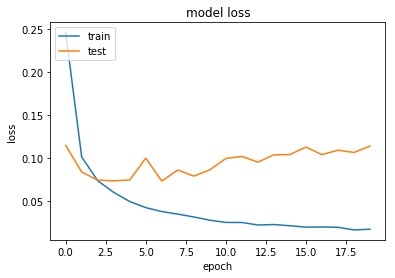

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

# 学習データの前処理
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# モデルの作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# コンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])


# 学習する
batch_size = 128 # バッチサイズ
epochs = 20 # エポック数
history = model.fit(
    x_train, y_train,
    batch_size=batch_size, epochs=epochs,
    verbose=1, validation_data=(x_test, y_test))


# 結果の表示
# 正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()